In [315]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


Por cuestiones de tiempo, empezamos a trabajar con el df de cortos, y si queda tiempo se hará el estudio para los largos. 

In [316]:
df_aerolinea = pd.read_csv('./datos/cortos.csv', index_col=0)
df_aerolinea.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,4,3,3,5,3,2
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,2,3,4,2,3,2


In [317]:
# nos hacemos una copia del df que acabamos de cargar
df = df_aerolinea.copy()

Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:

- Estandarizar las variables numéricas de vuestro set de datos
- Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.
- Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.
- Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [318]:
df.reset_index(inplace=True, drop=True)

Estandarización

In [319]:
# iniciamos el método para escalar
scaler = StandardScaler()

In [320]:
# recordemos que la estandarización solo se hace para las variables predictoras numéricas
numericas = df[["Age","Flight Distance"]]
numericas.head(2)

,Age,Flight Distance
0,65,265
1,47,2464


In [321]:
# ahora ya podemos ajustar nuestros datos.  
scaler.fit(numericas)

# transformamos los datos
X_escaladas = scaler.transform(numericas)

# por último convertiremos el array que nos devuelve en un dataframe. 
numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,Age,Flight Distance
0,1.676424,-1.758838
1,0.486731,0.583063


In [322]:
# dropeamos las columnas sin estandarizar

#df.drop(["Age", "Flight Distance"], axis = 1, inplace=True)
#df.head(2)

In [323]:
df["Age_est"]=numericas_estandar["Age"]
df["Flight Distance_est"]=numericas_estandar["Flight Distance"]
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding,Age_est,Flight Distance_est
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,4,3,3,5,3,2,1.676424,-1.758838
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,2,3,4,2,3,2,0.486731,0.583063


In [324]:
df.drop(["Age","Flight Distance"], axis=1, inplace=True)

Las que no tienen orden

In [325]:
lista_columnas = ["Gender", "Type of Travel","Class"]

df_encoded2 = pd.DataFrame()


for columna in lista_columnas:
    df_dummies2 = pd.get_dummies(df[columna], prefix_sep = "_", prefix = columna, dtype = int)

    df_encoded2 = pd.concat([df_encoded2, df_dummies2], axis = 1)

In [326]:
# ya tenemos nuestro dataframe con las variables codificadas,
df_encoded2.head()

,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,0,1,0,1,0
1,0,1,0,1,1,0,0
2,1,0,0,1,0,1,0
3,1,0,0,1,0,1,0
4,1,0,0,1,0,1,0


In [327]:
# el siguiente paso sería unir este dataframe con nuestro dataframe original para tener todos los datos en un mismo df

df_final = pd.concat([df, df_encoded2], axis = 1)
df_final.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,...,Online boarding,Age_est,Flight Distance_est,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,4,3,3,...,2,1.676424,-1.758838,1,0,0,1,0,1,0
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,2,3,4,...,2,0.486731,0.583063,0,1,0,1,1,0,0
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,2,3,...,2,-1.628279,0.235878,1,0,0,1,0,1,0
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,4,1,1,...,3,1.345954,-1.377574,1,0,0,1,0,1,0
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,3,2,2,...,5,2.006895,-1.664055,1,0,0,1,0,1,0


In [328]:
# por último nos queda eliminar las columnas categóricas originales porque ya no nos hacen falta. 

df_final.drop(lista_columnas, axis = 1, inplace=True)
df_final.head(2)

,satisfaction,Customer Type,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding,Age_est,Flight Distance_est,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,Loyal Customer,0,0,4,3,3,5,3,2,1.676424,-1.758838,1,0,0,1,0,1,0
1,satisfied,Loyal Customer,0,0,2,3,4,2,3,2,0.486731,0.583063,0,1,0,1,1,0,0


Las que si tienen orden

In [329]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [330]:
# definimos el diccionario

map_customer = {"disloyal Customer": 0, "Loyal Customer": 1}

In [331]:
df_final["Customer Type"] = df_final["Customer Type"].map(map_customer)
df_final.head(2)

,satisfaction,Customer Type,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding,Age_est,Flight Distance_est,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,1,0,0,4,3,3,5,3,2,1.676424,-1.758838,1,0,0,1,0,1,0
1,satisfied,1,0,0,2,3,4,2,3,2,0.486731,0.583063,0,1,0,1,1,0,0


In [332]:
# definimos el diccionario

map_satisfaction = {"dissatisfied": 0, "satisfied": 1}
df_final["satisfaction"] = df_final["satisfaction"].map(map_satisfaction)
df_final.head(2)

,satisfaction,Customer Type,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding,Age_est,Flight Distance_est,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,0,0,4,3,3,5,3,2,1.676424,-1.758838,1,0,0,1,0,1,0
1,1,1,0,0,2,3,4,2,3,2,0.486731,0.583063,0,1,0,1,1,0,0


### Desbalanceo

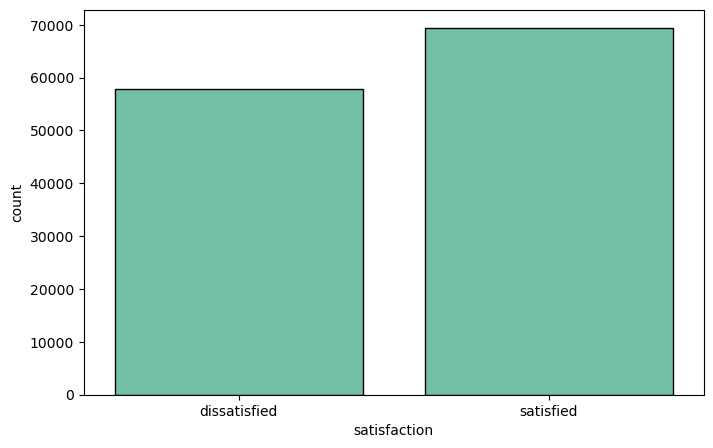

In [342]:
# recordemos como estaban distribuidos nuestros datos

plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df_final, x = "satisfaction",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["dissatisfied", "satisfied"]) 
plt.show()

In [343]:
(df_final['satisfaction'].value_counts()/df_final.shape[0])*100

1    54.509887
0    45.490113
Name: satisfaction, dtype: float64

Como podemos ver nuestros datos tiene un balanceo correcto por lo que no es necesario hacer el balanceo

Guardamos el dataframe

In [344]:
df_final.to_csv("./datos/cortos_estand.csv")